**Initialization + Reading Data**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data=pd.read_csv("gdrive/My Drive/test regression/f_data.csv")
data.head()

,Unnamed: 0,school,sex,age,address,Medu,Fedu,schoolsup,famsup,paid,...,absences,G1,G2,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Fjob_other,Fjob_teacher,G3
0,0,1,1,18,1,4,4,1,0,0,...,6,5,6,True,False,False,False,False,True,6
1,1,1,1,17,1,1,1,0,1,0,...,4,5,5,True,False,False,False,True,False,6
2,3,1,1,15,1,4,2,0,1,1,...,2,15,14,False,True,False,False,False,False,15
3,4,1,1,16,1,3,3,0,1,1,...,4,6,10,False,False,True,False,True,False,10
4,5,1,0,16,1,4,3,0,1,1,...,10,15,15,False,False,False,True,True,False,15


**Split Into Training, Validation, and Test Sets**

In [3]:
X = data.iloc[:, :-1]
y = data['G3']
print(X)

     Unnamed: 0  school  sex  age  address  Medu  Fedu  schoolsup  famsup  \
0             0       1    1   18        1     4     4          1       0   
1             1       1    1   17        1     1     1          0       1   
2             3       1    1   15        1     4     2          0       1   
3             4       1    1   16        1     3     3          0       1   
4             5       1    0   16        1     4     3          0       1   
..          ...     ...  ...  ...      ...   ...   ...        ...     ...   
214         385       0    1   18        0     2     2          0       0   
215         386       0    1   18        0     4     4          0       1   
216         388       0    1   18        1     3     1          0       1   
217         393       0    0   18        0     3     2          0       0   
218         394       0    0   19        1     1     1          0       0   

     paid  ...  Walc  absences  G1  G2  Mjob_at_home  Mjob_health  Mjob_oth

**Regression Helper Functions**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score
from time import time

# For some reason this code takes an insanely long amount of time to run on Google Colab.
def gridSearchReport( estimator, X, y, pg, cv=LeaveOneOut(), rs=118 ):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=rs)

    t0 = time()
    est_cv = GridSearchCV(estimator, param_grid=pg, scoring="neg_mean_squared_error", n_jobs=-1, cv=cv)
    est_cv.fit(X_train, y_train)

    print("Best parameters:", est_cv.best_params_)
    print("Best CV score:", abs(est_cv.best_score_))
    y_train_pred, y_test_pred = est_cv.predict(X_train), est_cv.predict(X_test)
    print("MSE, R2 train:", mean_squared_error(y_train, y_train_pred),
          ", ", r2_score(y_train, y_train_pred) )
    print("MSE, R2 test:", mean_squared_error(y_test, y_test_pred),
          ", ", r2_score(y_test, y_test_pred) )

    t = round(time()-t0, 2)
    print("Elapsed time:", t, "s ,", round(t/60, 2), "min")

    return est_cv

In [5]:
def plotResidue(estimator, X, y, rs=118):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=rs)

    residue_train = y_train - estimator.predict(X_train)
    residue_test = y_test - estimator.predict(X_test)

    fig, axe = plt.subplots(1, 2, figsize=(18,10))
    axe[0].scatter(list(range(0, X_train.shape[0])), residue_train, label = "train")
    axe[0].scatter(list(range(0, X_test.shape[0])), residue_test, label = "test")
    axe[0].set_xlabel("Scaled surface")
    axe[0].set_ylabel("Fit residulas")
    axe[0].legend()

    axe[1].hist(residue_test, bins=25)
    axe[1].set_xlabel("Fit residual for test set")
    axe[1].set_ylabel("Count")


    plt.show()

    print("mean residuals:", round(np.mean(residue_test), 2), "\nstd:", round(np.std(residue_test), 2))

In [6]:
rs = 120
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=rs)

(219, 24) (219,)


**Linear Regression**

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
r2_score(y_train, lr.predict(X_train)), r2_score(y_test, lr.predict(X_test))

(0.9444308379194513, 0.9132980966621459)

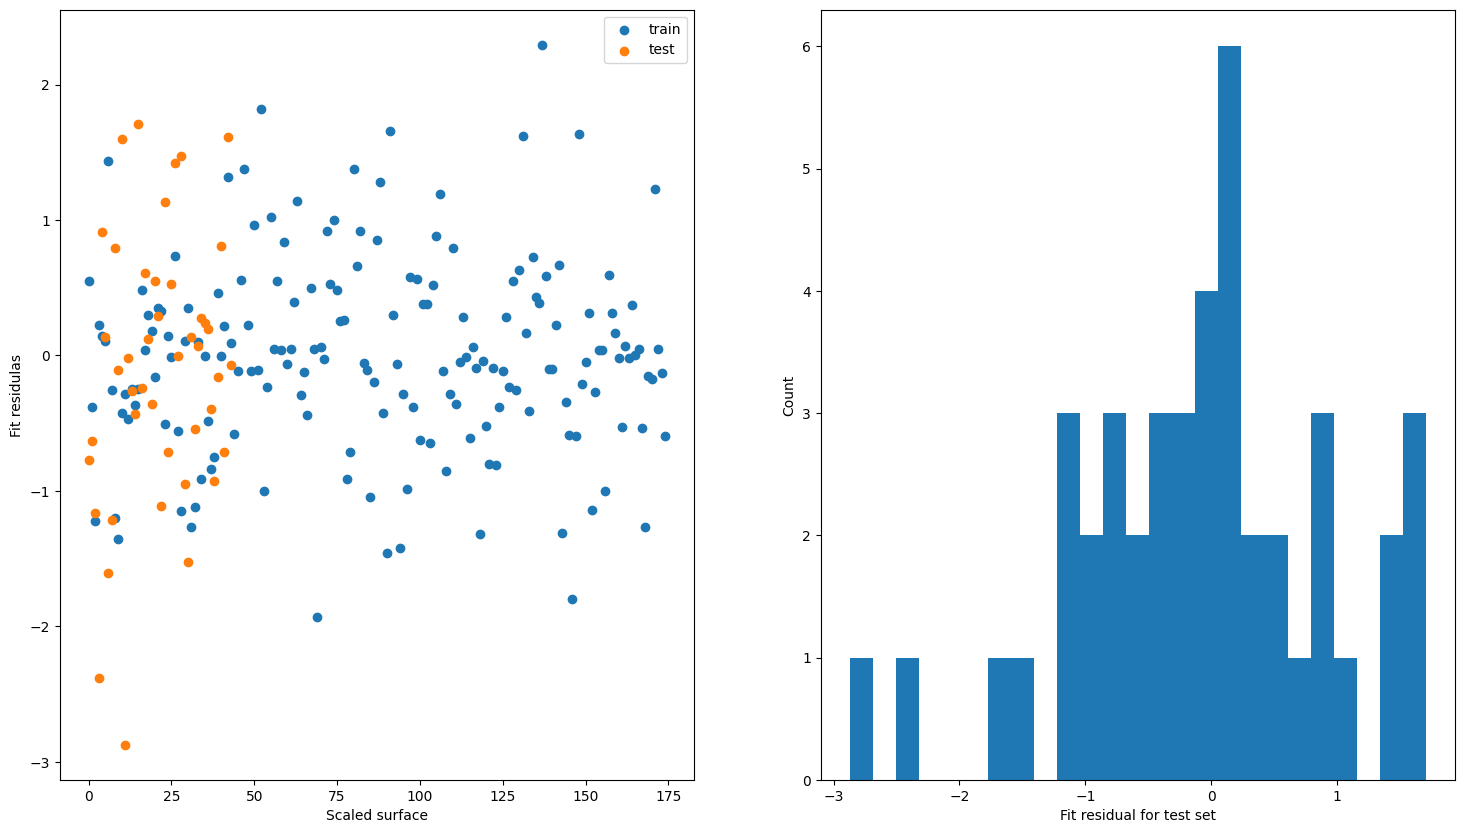

mean residuals: -0.1 
std: 1.0


In [24]:
plotResidue(lr, X, y, rs = rs)

**Ridge Regression**

In [22]:
rdg = Ridge(alpha=4.0)
rdg.fit(X_train, y_train)

Ridge(alpha=4.0)

In [23]:
r2_score(y_train, rdg.predict(X_train)), r2_score(y_test, rdg.predict(X_test))

(0.9442508894380254, 0.9158719578522959)

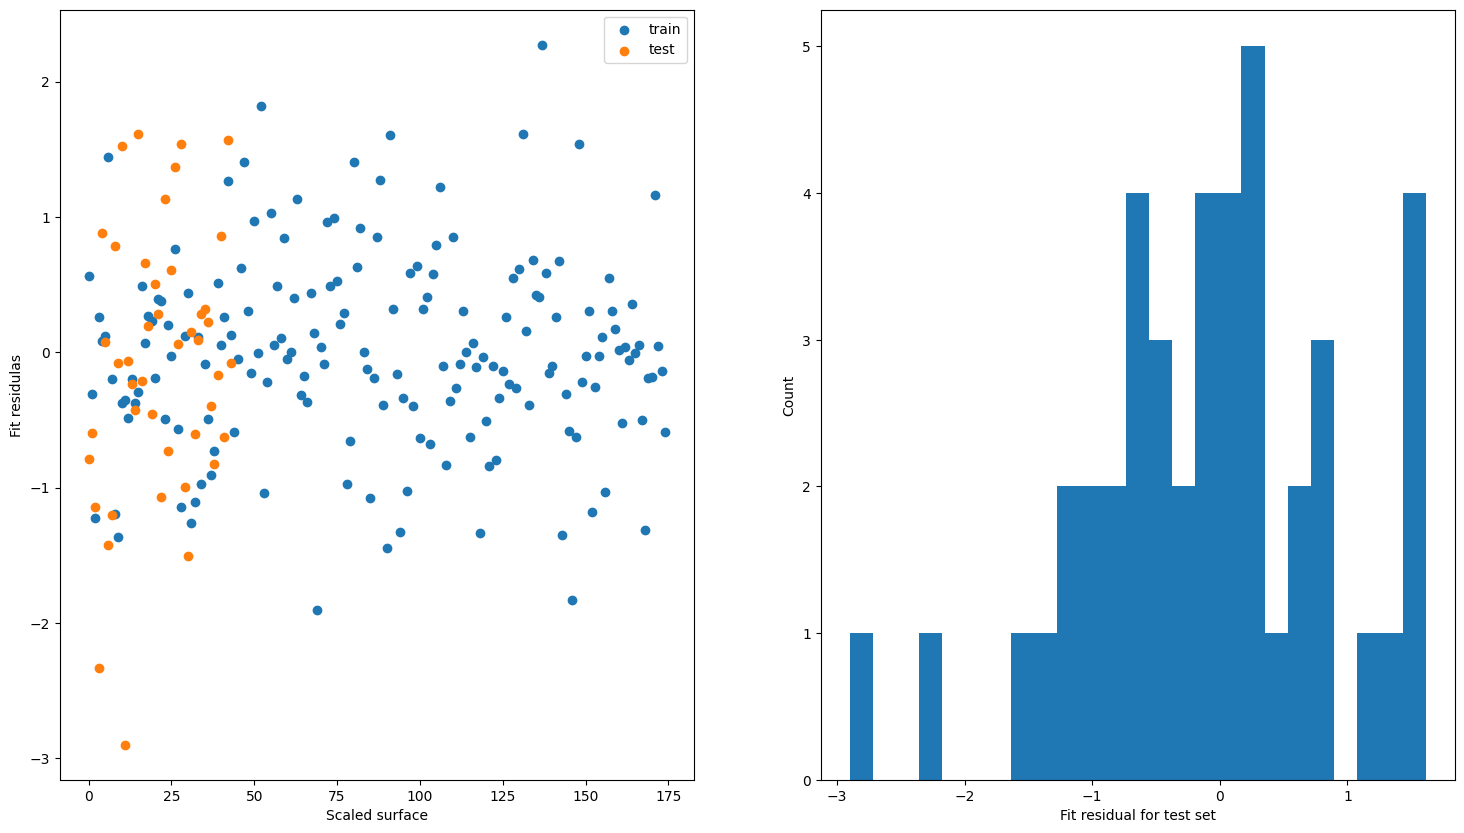

mean residuals: -0.09 
std: 0.99


In [29]:
plotResidue(rdg, X, y, rs = rs)

**Lasso Regression**

In [31]:
lso = Lasso(alpha=0.01)
lso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [32]:
r2_score(y_train, lso.predict(X_train)), r2_score(y_test, lso.predict(X_test))

(0.9431416843388367, 0.9219948310720775)

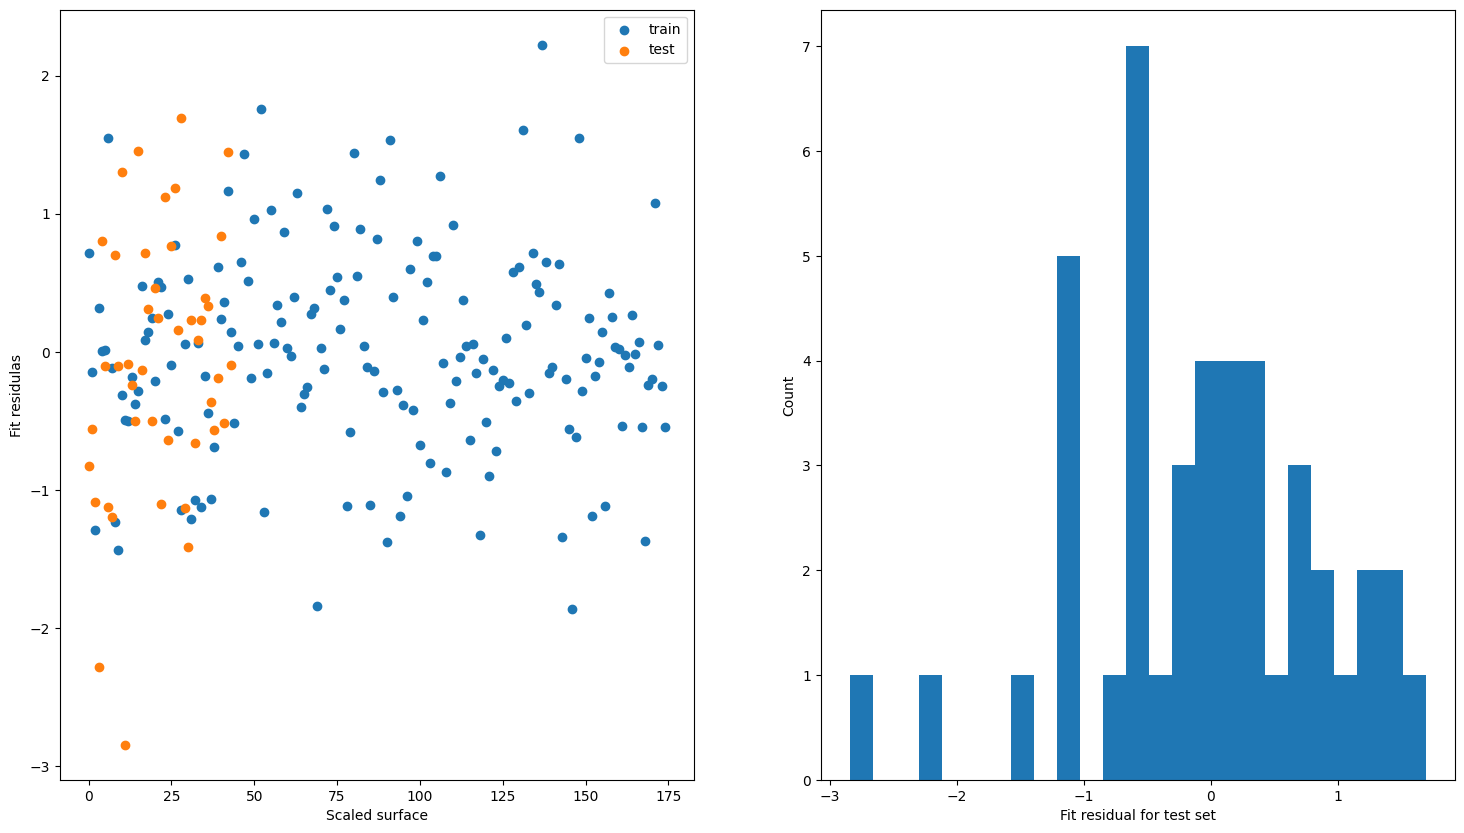

mean residuals: -0.09 
std: 0.95


In [33]:
plotResidue(lso, X, y, rs = rs)

**Random Forest Regression**

In [10]:
rfr = RandomForestRegressor(random_state = rs)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=120)

In [17]:
r2_score(y_train, rfr.predict(X_train)), r2_score(y_test, rfr.predict(X_test))

(0.9895025747732635, 0.9104486979627989)

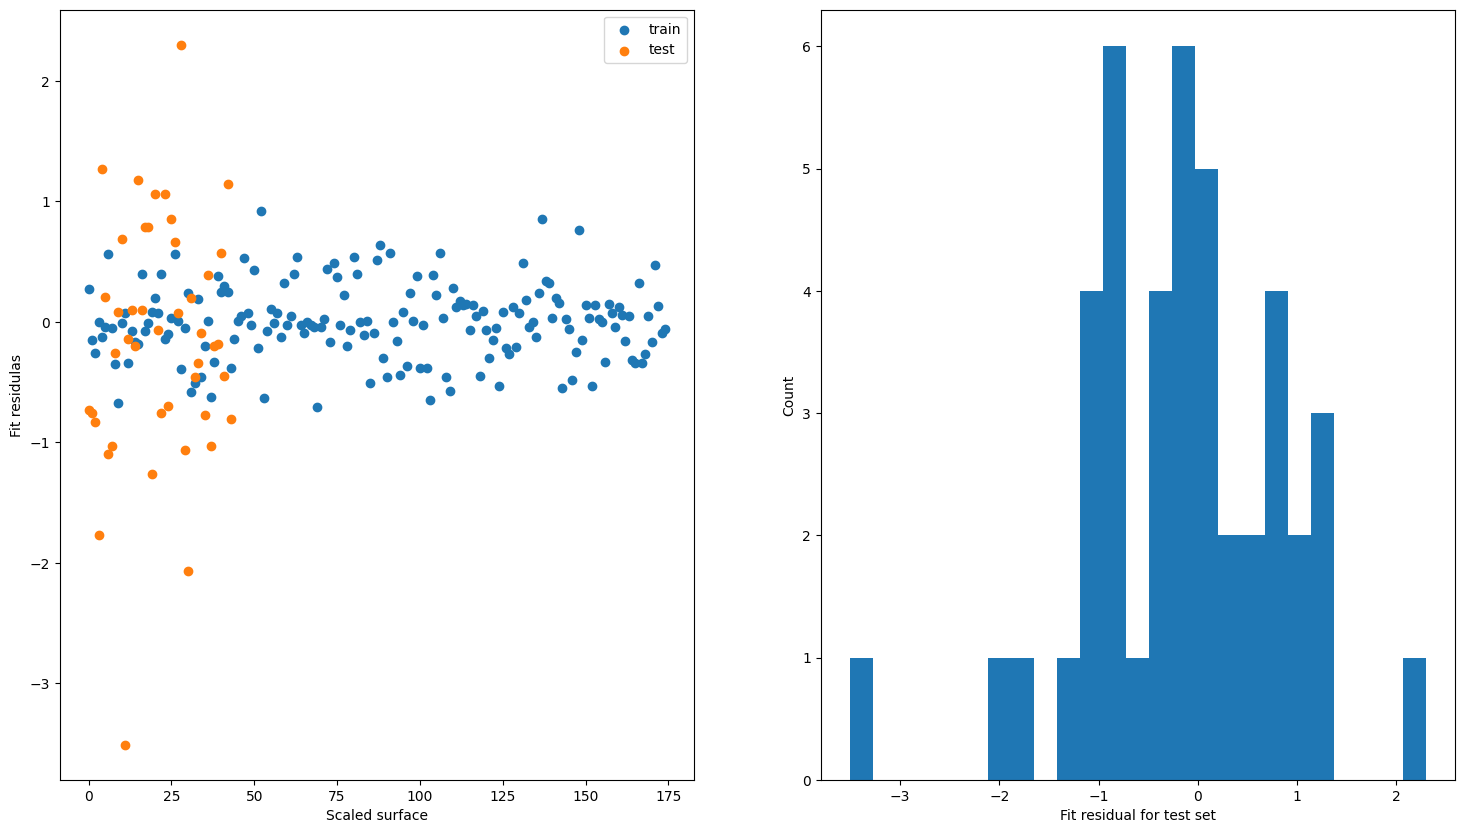

mean residuals: -0.16 
std: 1.01


In [13]:
plotResidue(rfr, X, y, rs = rs)